In [3]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import pickle


In [4]:
json_file_path = "/home/ashrafs/projects/dataset/fever/all_statements.json"
graph_file_path = "/home/ashrafs/projects/dataset/fever/all_graphs.pkl"
dev_data_path = '/home/ashrafs/projects/dataset/FEVER-Processed/feverous_dev_challenges_statements.jsonl'

In [6]:

# Initialize a counter for the claims
total_claims = 0

# Open and read the JSON file
with open(json_file_path, 'r') as file:
    data = json.load(file)
    total_claims = len(data)  # Each item in the list is a claim

print(f"Total number of claims: {total_claims}")


Total number of claims: 1083


Total number of claims: 1083

Claim with the maximum number of statements: Germain Van der Steen, who graduated from Oxford (which is a collegiate research university in Oxford, England) was taught by master painters and had exhibitions in France, Yugoslavia, Croatia, the United States, Belgium, Austria, Germany, Brazil and Israel.

Claim with Max Number of statements: 5136

In [41]:

# Variables to keep track of the claim with the most statements
max_statements_count = 0
claim_with_max_statements = None

# Open and read the JSON file
with open(json_file_path, 'r') as file:
    data = json.load(file)

    # Iterate through each claim
    for item in data:
        current_statement_count = len(item["STATEMENTS"])
        
        # Check if the current claim has more statements than the previous maximum
        if current_statement_count > max_statements_count:
            max_statements_count = current_statement_count
            claim_with_max_statements = item["CLAIM"]

print(f"Claim with the maximum number of statements: {claim_with_max_statements}")
print(f"Number of statements: {max_statements_count}")


Claim with the maximum number of statements: Germain Van der Steen, who graduated from Oxford (which is a collegiate research university in Oxford, England) was taught by master painters and had exhibitions in France, Yugoslavia, Croatia, the United States, Belgium, Austria, Germany, Brazil and Israel.
Number of statements: 5136


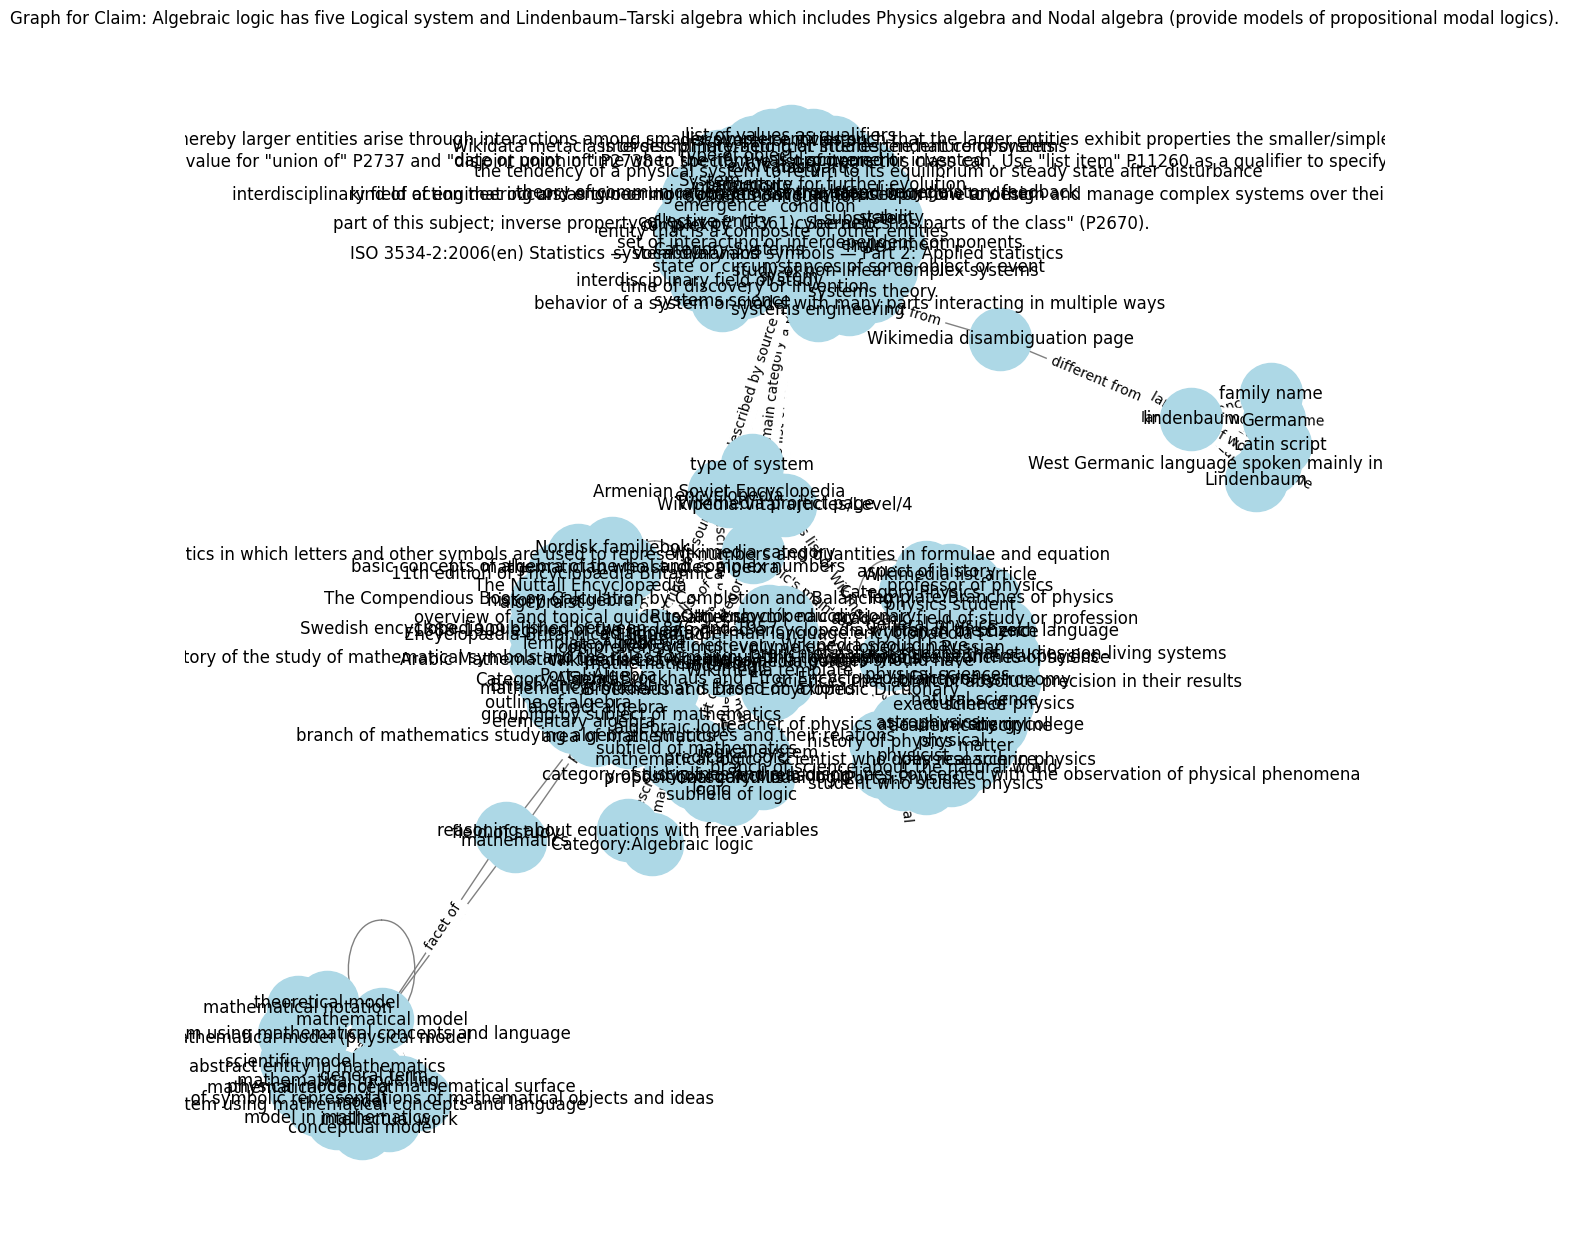

Claim 'Algebraic logic has five Logical system and Lindenbaum–Tarski algebra which includes Physics algebra and Nodal algebra (provide models of propositional modal logics).' is fully connected.



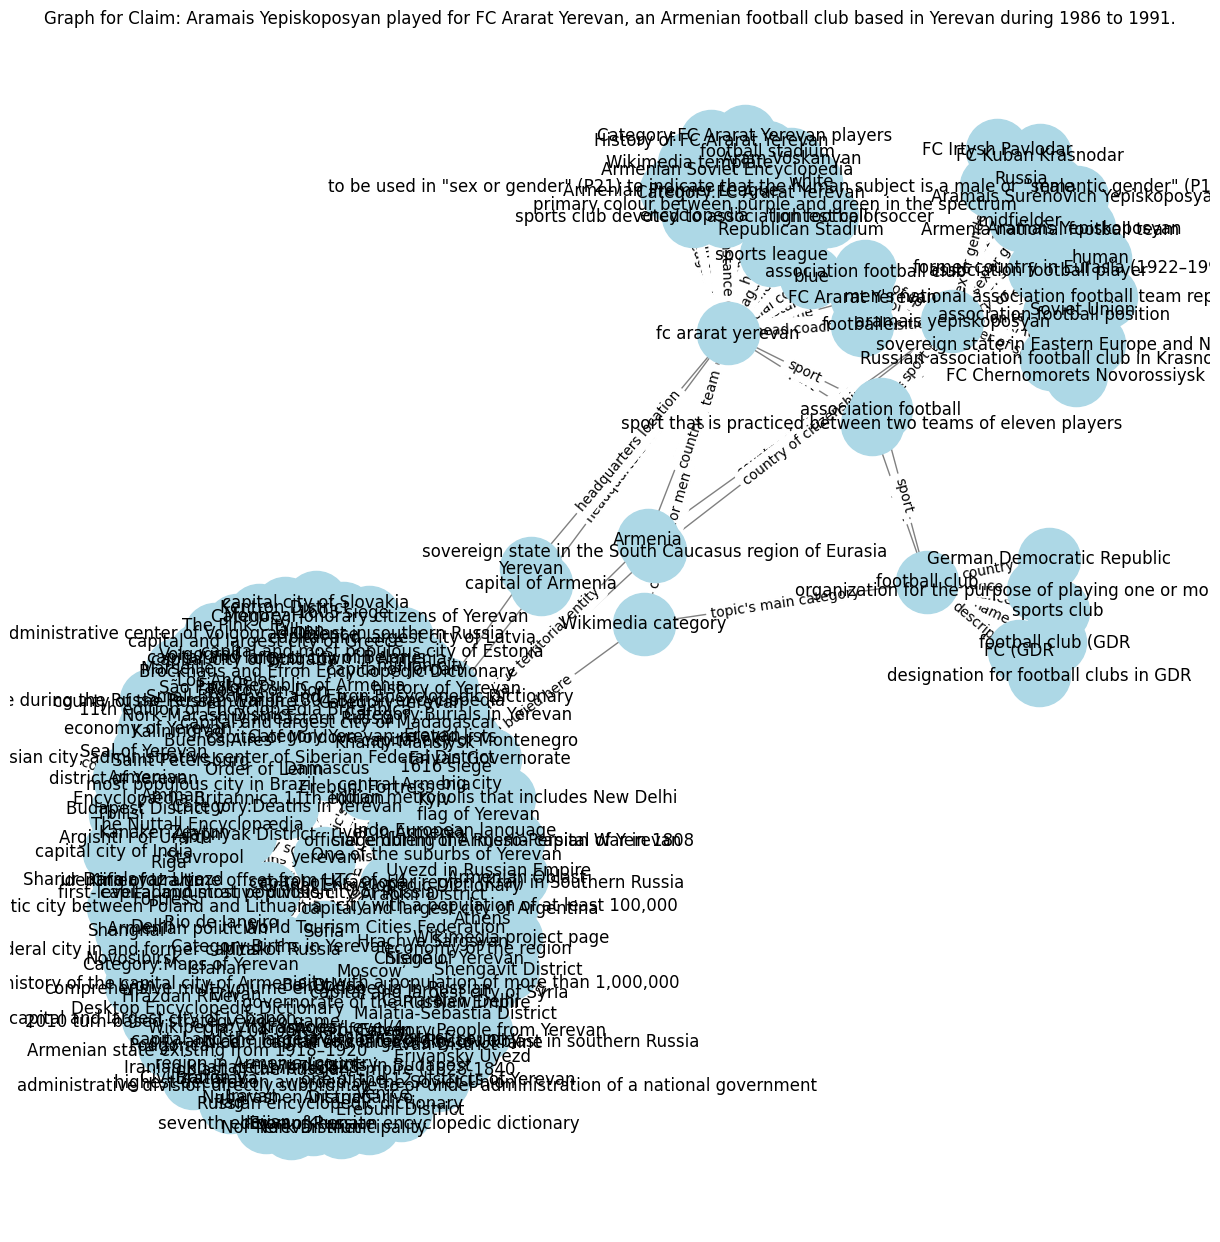

Claim 'Aramais Yepiskoposyan played for FC Ararat Yerevan, an Armenian football club based in Yerevan during 1986 to 1991.' is fully connected.



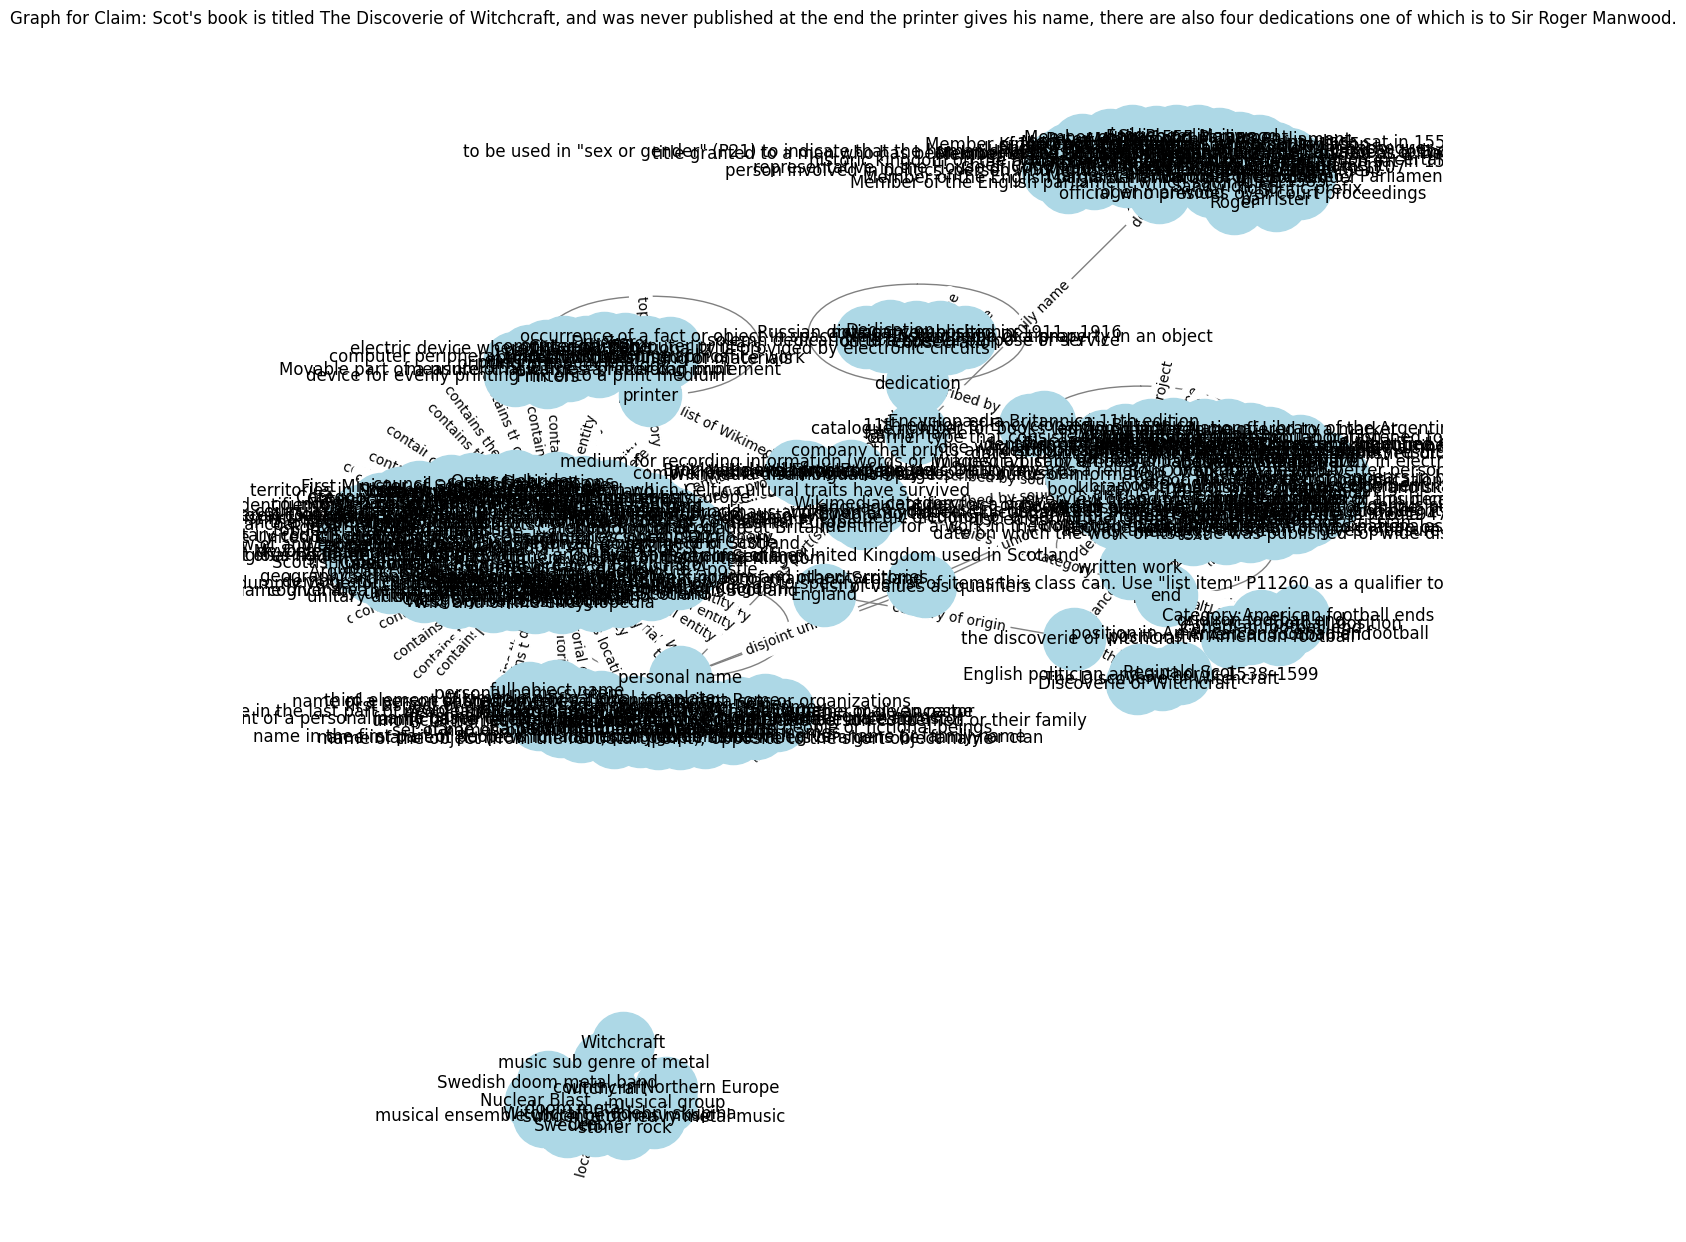

Claim 'Scot's book is titled The Discoverie of Witchcraft, and was never published at the end the printer gives his name, there are also four dedications one of which is to Sir Roger Manwood.' is not fully connected.



In [37]:

# Function to create and visualize graph
def create_and_visualize_graph(claim, statements):
    G = nx.Graph()
    for statement in statements:
        # Safely parse each statement
        parts = statement.strip('()').split(', ')
        if len(parts) == 3:
            subj, rel, obj = parts
            G.add_node(subj)
            G.add_node(obj)
            G.add_edge(subj, obj, label=rel)

    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000)
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(f"Graph for Claim: {claim}")
    plt.show()

    return nx.is_connected(G)

# Process each claim
for item in data:
    claim = item['CLAIM']
    statements = item['STATEMENTS']
    is_fully_connected = create_and_visualize_graph(claim, statements)
    print(f"Claim '{claim}' is {'fully connected' if is_fully_connected else 'not fully connected'}.\n")

In [46]:
# Dictionary to hold all graphs
all_graphs = {}

# Function to create a graph
def create_graph(statements):
    G = nx.Graph()  # Use DiGraph() for directed graphs
    for statement in statements:
        parts = statement.strip('()').split(', ')
        if len(parts) == 3:
            subj, rel, obj = parts
            G.add_node(subj)
            G.add_node(obj)
            G.add_edge(subj, obj)
    return G

# Initialize counters
connected_count = 0
not_connected_count = 0

# Process each claim
for item in data:
    claim = item['CLAIM']
    statements = item['STATEMENTS']
    graph = create_graph(statements)
    all_graphs[claim] = graph

    
    # Check if the graph is connected and update the counters
    if nx.is_connected(graph):  # For directed graphs, use nx.is_strongly_connected() or nx.is_weakly_connected()
        connected_count += 1
    else:
        not_connected_count += 1

# Print the results
print(f"Number of Connected Claims: {connected_count}")
print(f"Number of Not Connected Claims: {not_connected_count}")

# Save all graphs to a single file
with open(graph_file_path, 'wb') as file:
    pickle.dump(all_graphs, file)


Number of Connected Claims: 471
Number of Not Connected Claims: 612


In [47]:
# Function to load all graphs
def load_all_graphs(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)

# Load the graphs
all_loaded_graphs = load_all_graphs(graph_file_path)


In [43]:

# Function to create a directed graph
def create_directed_graph(statements):
    G = nx.DiGraph()  # Use DiGraph for directed graphs
    for statement in statements:
        parts = statement.strip('()').split(', ')
        if len(parts) == 3:
            subj, rel, obj = parts
            G.add_node(subj)
            G.add_node(obj)
            G.add_edge(subj, obj)  # Directed edge from subj to obj
    return G

# Initialize counters
strongly_connected_count = 0
weakly_connected_count = 0
not_connected_count = 0

# Process each claim
for item in data:
    claim = item['CLAIM']
    statements = item['STATEMENTS']
    graph = create_directed_graph(statements)
    
    # Check connectivity
    if nx.is_strongly_connected(graph):
        strongly_connected_count += 1
    elif nx.is_weakly_connected(graph):
        weakly_connected_count += 1
    else:
        not_connected_count += 1

# Print the results
print(f"Number of Strongly Connected Claims: {strongly_connected_count}")
print(f"Number of Weakly Connected Claims: {weakly_connected_count}")
print(f"Number of Not Connected Claims: {not_connected_count}")


Number of Strongly Connected Claims: 0
Number of Weakly Connected Claims: 471
Number of Not Connected Claims: 612
